<h1> Function minimization and optimization algorithms </h1>

In [42]:
from matplotlib import pylab as plt
import numpy as np
from scipy import optimize

<h3> Plot the given complicated function graph </h3>

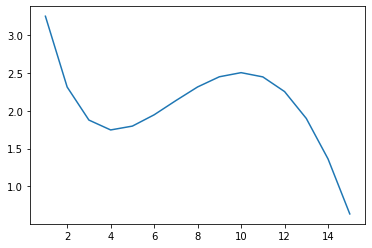

In [43]:
%matplotlib inline
x = np.arange(1, 16)
f = np.sin(x / 5.) * np.exp(x / 10.) + 5. * np.exp(-x / 2.)
plt.plot(x, f)
plt.show()

<h3> Approximate the function by first-order line </h3>

In [44]:
x = np.arange(1, 16, 14)
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
b = []
a = np.ones((2,2))
i = 0
for xi in x:
    b.append(f(xi))
    a[i,1] = xi
    i += 1
w = np.linalg.solve(a,b)

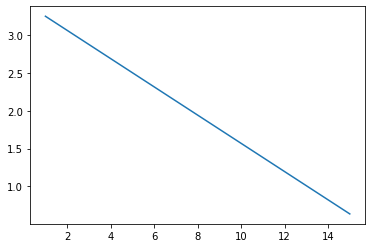

In [45]:
x = np.arange(1,16)
y = w[0] + w[1] * x
plt.plot(x, y)
plt.show()

<h3> Approximate the function by third-order line </h3>

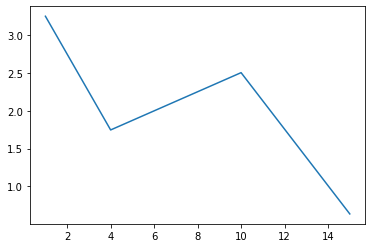

In [46]:
x = np.array([1, 4, 10, 15])
def f(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5. * np.exp(-x / 2.)
b = []
a = np.ones((4,4))
i = 0
for xi in x:
    b.append(f(xi))
    a[i,1] = xi
    a[i,2] = xi**2
    a[i,3] = xi**3
    i += 1
w = np.linalg.solve(a,b)
y = w[0] + w[1] * x + w[2] * (x ** 2) + w[3] * (x ** 3)
plt.plot(x, y)
plt.show()

<h3> Find 2 minimums by BFGS and write it to file </h3>

In [108]:
def f(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5. * np.exp(-x / 2.)
min1 = optimize.minimize(f, x0 = 2, method = 'BFGS')
res1 = round(min1.fun,2)
res1

1.75

In [132]:
min2 = optimize.minimize(f, x0 = 30, method = 'BFGS')
res2 = round(min2.fun,2)
res2

-11.9

In [ ]:
res = str(res1) + ' ' + str(res2)
with open('task1.txt', 'w') as file:
    file.write(res)

<h3> Find global minimum by differential evolution and write it to file </h3>

In [111]:
min3 = optimize.differential_evolution(f, [[1,30]])
res3 = str(round(min3.fun[0],2))
with open('task2.txt', 'w') as file:
    file.write(res3)

<h3> Find minimum of nonsmooth function by BFGS and differential evolution. Then write it to file </h3>

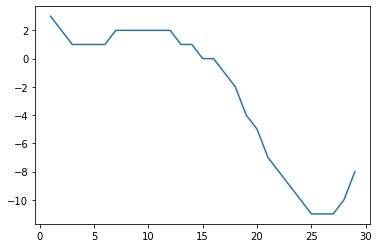

In [120]:
x = np.arange(1, 30)
def f(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5. * np.exp(-x / 2.)
def h(x):
    res = []
    for xi in x:
        res.append(int(f(xi)))
    return res

plt.plot(x, h(x))
plt.show()

In [130]:
def h(x):
    return int(f(x))
min4 = optimize.minimize(h, x0 = 30, method = 'BFGS')
res4 = min4.fun
min5 = optimize.differential_evolution(h, [[1,30]])
res5 = min5.fun
result = str(res4) + ' ' + str(res5)
with open('task3.txt','w') as file:
    file.write(result)